In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import math
import matplotlib.pyplot as plt

# Dataset 1:-

**Source**: https://www.kaggle.com/jameslko/gun-violence-data

**About the dataset**:
Below steps were followed by the author who collaborated multiple datasets from gunviolencearchive.org using web scraping techniques.

Reference: https://www.gunviolencearchive.org/

Stage 1: For each date between 1/1/2013 and 3/31/2018, 
a Python script queried all incidents that happened at that particular date, 
then scraped the data and wrote it to a CSV file. Each month got its own CSV file, 
with the exception of 2013, since not many incidents were recorded from then.

Stage 2: Each entry was augmented with additional data not directly viewable from the query 
results page, such as participant information, geolocation data, etc.

Stage 3: The entries were sorted in order of increasing date, then merged into a single CSV file.

**Goal**: We want to analyze the trend in the gun violence incidents over the years and also check if there is any correlation between the use of guns and the demography of the users.

In [2]:
df  = pd.read_csv('https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/gun-violence-data_01-2013_03-2018.csv')

##### Extracting Column names of the dataset

In [3]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

## Data Description:
<br>
<ui>
    <li>incident_id:</li>
    <li>date: Date of crime</li>
    <li>state: State of crime</li>
    <li>city_or_county: City/ County of crime</li>
    <li>address: Address of the location of the crime</li>
    <li>n_killed: Number of people killed</li>
    <li>n_injured: Number of people injured</li>
    <li>incident_url: URL regarding the incident</li>
    <li>source_url: Reference to the reporting source</li>
    <li>incident_url_fields_missing: TRUE if the incident_url is present, FALSE otherwise</li>
    <li>congressional_district: Congressional district id</li>
    <li>gun_stolen: Status of guns involved in the crime (i.e. Unknown, Stolen, etc...)</li>
    <li>gun_type: Typification of guns used in the crime</li>
    <li>incident_characteristics: Characteristics of the incidence</li>
    <li>latitude: Location of the incident</li>
    <li>location_description: Description of location</li>
    <li>longitude: Location of the incident</li>
    <li>n_guns_involved: Number of guns involved in incident</li>
    <li>notes: Additional information of the crime</li>
    <li>participant_age: Age of participant(s) at the time of crime</li>
    <li>participant_age_group: Age group of participant(s) at the time crime</li>
    <li>participant_gender: Gender of participant(s)</li>
    <li>participant_name: Name of participant(s) involved in crime</li>
    <li>participant_relationship: Relationship of participant to other participant(s)</li>
    <li>participant_status: Extent of harm done to the participant</li>
    <li>participant_type: Type of participant</li>
    <li>sources: Participants source</li>
    <li>state_house_district: Voting house district</li>
    <li>state_senate_district: Territorial district from which a senator to a state legislature is elected</li>
  </ui>  

## Data Cleaning

##### Checking for Null values

In [4]:
df.isna().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [5]:
df.head(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


##### Adding a column which shows the number of Adults involved in the incident 

In [6]:
df['Adult 18+'] = df['participant_age_group'].str.count('Adult 18+')


##### Adding a column which shows the number of Teens involved in the incident 

In [7]:
df['Teen 12-17'] = df['participant_age_group'].str.count('Teen 12-17')


##### Adding a column which shows the number of Chilren involved in the incident 

In [8]:
df['Child 0-11'] = df['participant_age_group'].str.count('Child 0-11')

##### Adding columns which show the number of Male and Female involved in the incident

In [9]:
df['# Male_Involved'] = df['participant_gender'].str.count('Male')
df['# Female_Involved'] = df['participant_gender'].str.count('Female')


##### Adding columns which show the number of Victims and Suspects involved in the incident

In [10]:
df['#Victims'] = df['participant_type'].str.count('Victim')
df['#Suspects'] = df['participant_type'].str.count('Suspect')

##### Adding a column which shows the number stolen guns involved in the incident

In [11]:
df['#Stolen_Guns_Involved'] = df['gun_stolen'].str.count('Stolen')


##### Adding a column which shows the number of Officers involved in the incident

In [12]:
df['#Officers_involved'] = df['incident_characteristics'].str.count('Officer')

##### Adding a column which has True/False values for Mass Shooting incidents

In [13]:
df['Is_Mass_Shooting'] = df['incident_characteristics'].str.contains('Mass Shooting')


##### Adding a column which shows the number of people arrested pertaining to an incident

In [14]:
df['#Arrested'] = df['participant_status'].str.count('Arrested')


##### Replacing the Null values with 0s in the newly created columns.


In [15]:
df['Adult 18+'].fillna(0 , inplace = True)
df['Teen 12-17'].fillna(0 , inplace = True)
df['Child 0-11'].fillna(0 , inplace = True)
df['# Male_Involved'].fillna(0 , inplace = True)
df['# Female_Involved'].fillna(0 , inplace = True)
df['#Victims'].fillna(0 , inplace = True)
df['#Suspects'].fillna(0 , inplace = True)
df['#Stolen_Guns_Involved'].fillna(0 , inplace = True)
df['#Officers_involved'].fillna(0 , inplace = True)
df['#Arrested'].fillna(0 , inplace = True)
df['Is_Mass_Shooting'].fillna( False, inplace = True)


##### Creating a copy of the dataframe

In [16]:
df_rev = df.copy()

##### Dropping unneccessary columns

In [17]:
df_rev.drop(['source_url' , 'incident_url_fields_missing' , 'sources' ,'incident_url', 'participant_relationship' ,'participant_age', 'location_description' ,'participant_age_group' , 'participant_gender' , 'participant_name' , 'congressional_district' , 'gun_stolen' ,'gun_type' , 'incident_characteristics' , 'notes' , 'participant_name' , 'participant_status'] , axis = 1 , inplace = True)

## Creating a plot to see the average number of monthly incidents pattern over the years 2013 to 2018

,Avg monthly per year
Year,
2013,23.166667
2014,4321.166667
2015,4464.916667
2016,4896.916667
2017,5116.750000
2018,4600.666667


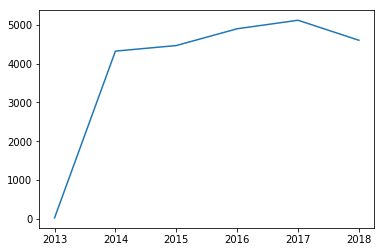

In [18]:
df_rev['date'] = pd.to_datetime(df_rev['date'])
df_rev['Year'] = df_rev['date'].dt.year
df_rev['Month'] = df_rev['date'].dt.month

new_temp = df_rev.groupby(['Year','Month'])['Month'].agg(['count']).rename(columns = {'count' : 'Monthwise incidents per year'})
#new_temp
new_temp1 = new_temp.groupby('Year').mean().rename(columns = {'Monthwise incidents per year':'Avg monthly per year'})
new_temp1

plt.plot(new_temp1.index, new_temp1['Avg monthly per year'].values, label="Avg monthly per year")    

In [49]:
df_rev.to_csv("Gun_Violence.csv",index=False)

# Data Set 2:-

<b>Source</b>: https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list#data

**About the dataset**
The world’s crime figures are collected by the UNODC through its annual crime survey. It has a special section of data on firearm homicides - and provides detailed information by size of population and compared to other crimes. It is not a perfect dataset - some key nations are missing from the data, including Russia, China and Afghanistan. But it does include the US, UK and many other developed nations.

**Goal:**
To find where are the world’s guns and which countries have the highest rates of firearms murders?

In [50]:
df_country = pd.read_csv('https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/Country_Wise_Violations.csv')

##### Extracting Column names of the dataset

In [51]:
df_country.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

## Data Description
<br>
<ui>
    <li>Country/Territory: Country Name</li>
    <li>ISO code: Abbreviation of country</li>
    <li>Source: Source of data</li>
    <li>% of homicides by firearm: </li>
    <li>Number of homicides by firearm: </li>
    <li>Homicide by firearm rate per 100,000 pop: </li>
    <li>Rank by rate of ownership</li>
    <li>Average firearms per 100 people</li>
    <li>Average total all civilian firearms</li>
</ui>

In [52]:
df_country.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [53]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
Country/Territory                           185 non-null object
ISO code                                    184 non-null object
Source                                      116 non-null object
% of homicides by firearm                   116 non-null float64
Number of homicides by firearm              116 non-null float64
Homicide by firearm rate per 100,000 pop    116 non-null float64
Rank by rate of ownership                   176 non-null float64
Average firearms per 100 people             176 non-null float64
Average total all civilian firearms         176 non-null float64
dtypes: float64(6), object(3)
memory usage: 13.1+ KB


In [54]:
df_country.isna().sum()

Country/Territory                            0
ISO code                                     1
Source                                      69
% of homicides by firearm                   69
Number of homicides by firearm              69
Homicide by firearm rate per 100,000 pop    69
Rank by rate of ownership                    9
Average firearms per 100 people              9
Average total all civilian firearms          9
dtype: int64

##### Creating a plot to see the top 5 ranked countries with most firearms and their corresponding average number of firearms per 100 people

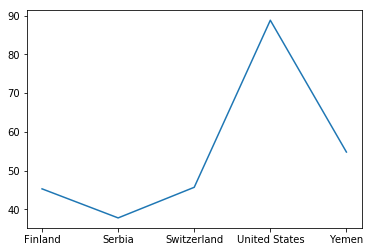

In [55]:
Top_ranked_gun_owner_countries = df_country[df_country['Rank by rate of ownership'] <=5]

plt.plot(Top_ranked_gun_owner_countries['Country/Territory'].values, Top_ranked_gun_owner_countries['Average firearms per 100 people'].values, label="Ranking")    


In [56]:
df_country.to_excel("Gun_Violence_CountryUpdated.xls",index=False)

# Dataset 3 :- Law on Background Check

<b>Source</b>: https://everytownresearch.org/navigator/states.html?dataset=background_checks&states=NY#q-bc_required

<b>About the dataset</b>: Federal law, which applies in all states, requires criminal background checks for all firearm sales and transfers by licensed dealers, but does not require background checks or any process for sales or transfers by unlicensed sellers. This dataset shows which US state has implemented background check in specific year.

<b>Goal</b>: We want to analyze whether the background checks reduce the incidents of gun violence by comparing this current dataset with other datasets.

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

In [58]:
df= pd.read_csv("https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/Everytown_research.csv")

In [59]:
df.head()

,question,state,year,applies to,response,citations,cautions
0,Does state law require criminal background che...,HI,1991,All,Yes,Haw. Rev. Stat. §134-2,NaN
1,Does state law require criminal background che...,AK,1991,All,No,NaN,NaN
2,Does state law require criminal background che...,OR,1991,All,No,NaN,NaN
3,Does state law require criminal background che...,WA,1991,All,No,NaN,NaN
4,Does state law require criminal background che...,CA,1991,All,Yes,"Cal. Penal Code §§ 12072(c),(d), 12076(d), 120...",NaN


## Data Description
<ui>
    <li>question : Asks the question 'Does state law require criminal background checks for gun sales by unlicensed sellers?' </li>
    <li>state: State within USA</li>
    <li>year: Year in which background check status has to be checked</li>
    <li>applies to: Shows areas where background check is been applied</li>
    <li>citations: Shows the penal code</li>
    <li>cautions: Limitations</li>
</ui>

## Data Cleaning

There are certain columns which are not useful for our future analysis. Hence, we are dropping them and renaming the relevant columns for better understanding.

##### Renaming Columns

In [60]:
df.rename(columns={"response":"Background_check_reqd?"},inplace=True)

##### Dropping Irrelevant Columns

In [61]:
df.drop(['question','applies to','cautions','citations'],axis=1,inplace=True)

##### Considering the data from 2013 onwards in accordance to the other datasets we have

In [62]:
dfn=df[df.year >= 2013]

##### Checking for null values

In [63]:
dfn.isna().sum()

state                     0
year                      0
Background_check_reqd?    0
dtype: int64

In [64]:
dfn.head()

,state,year,Background_check_reqd?
1122,HI,2013,Yes
1123,AK,2013,No
1124,OR,2013,No
1125,WA,2013,No
1126,CA,2013,Yes


In [66]:
dfn.to_excel("Gun Violence Background.xls",index=False)

# Dataset 4:- People Injured and Killed in Mass Shootings

**Source:** https://www.gunviolencearchive.org/reports

**About the dataset:** The final dataset provides with the information about different mass shootings that have taken place over the US from 2014 to 2019, and corresponding information about the number of casualities, the location and the date of the incident. The final dataset that we'll be using comprises of the datasets of the years 2014 to 2019 merged together.

**Goal:** We want to analyse the trend of mass shootings over the years and determine the impact of these incidents by observing the average casulities for each incident. 

In [67]:
import pandas as pd
import numpy as np

##### Reading the Mass Shooting files for different years in dataframes

In [68]:
df1=pd.read_csv('https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/Mass%20shooting%202016.csv',index_col=0, parse_dates=True)
df2=pd.read_csv('https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/Mass%20shooting%202017.csv',index_col=0, parse_dates=True)
df3=pd.read_csv('https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/Mass%20Shooting%202018.csv',index_col=0, parse_dates=True)
df4=pd.read_csv('https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/Mass%20shooting%202019.csv',index_col=0, parse_dates=True)
df5=pd.read_csv('https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/MS-1.csv',index_col=0, parse_dates=True)
df6=pd.read_csv('https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/Mass%20Shooting_2015.csv',index_col=0, parse_dates=True)

##### Appending the files to a single dataframe

In [69]:
df=df1.append(df2).append(df3).append(df4).append(df5).append(df6)

In [70]:
df.head(5)

,State,City Or County,Address,# Killed,# Injured,Operations
Incident Date,,,,,,
2016-12-31,Georgia,Lenox (El Dorado),27 Briarwood Ct,2,2,NaN
2016-12-31,Texas,Houston,3704 Fannin Street,1,3,NaN
2016-12-30,Ohio,Mansfield,3230 Possum Run Rd,0,5,NaN
2016-12-30,Connecticut,Wallingford,95 S Turnpike Rd,2,3,NaN
2016-12-28,Georgia,Columbus,2914 10th Street,1,4,NaN


## Data Description:
<ui>
    <li>Incident Date: Date of the Incident</li>
    <li>State: State where the incident took place</li>
    <li>City or County: City or county of the incident</li>
    <li>Address: Address where the incident took place</li>
    <li>Killed: Number of people killded in the incident</li>
    <li>Injured: Number of people injured in the incident</li>

## Data Cleaning
There are certain columns which are not useful for our future analysis. Hence, we are dropping them and renaming the relevant columns for better understanding.

In [71]:
df.drop('Operations', axis =1, inplace=True)

In [72]:
df.drop('Address', axis =1, inplace=True)

In [73]:
df.head()

,State,City Or County,# Killed,# Injured
Incident Date,,,,
2016-12-31,Georgia,Lenox (El Dorado),2,2
2016-12-31,Texas,Houston,1,3
2016-12-30,Ohio,Mansfield,0,5
2016-12-30,Connecticut,Wallingford,2,3
2016-12-28,Georgia,Columbus,1,4


##### Save dataframe to file

In [74]:
df.to_excel("Mass Shooting 2014-2019.xls",index=False)

# Dataset 5:- Country wise world population 

**Source:** https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart

**About the dataset:** The dataset consists of country wise population from the year 1960-2017. We are using the world population column for the year 2017. This dataset can be merged with Dataset 2 mentioned above to show the relationship between the total population of United States and total guns owned by the civilians in United States.

**Goal**: To compare:

1) The population of the united states with the population of other countries

2) The total number of civilian-owned guns in the United States with the guns owned by civilians in the other countries.

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns

In [124]:
df_pop = pd.read_csv("https://media.githubusercontent.com/media/bharatikandakumar/Data-Visualization-Project/master/raw_data/World_Population.csv")

In [125]:
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN,NaN


In [126]:
df_pop_updated = df_pop[['Country Name','Country Code','2017']]

In [127]:
df.to_excel("World Population 2017.xls",index=False)